# Comparison of CVO-QRAM using different multi-controlled gate implementations
### Section 4 (Figure 12)

In [12]:
import matplotlib.pyplot as plt
import qiskit

from itertools import product
from copy import deepcopy
from qclib.state_preparation import CvoqramInitialize
from qclib.util import double_sparse

In [10]:
# Number of nonzero amplitudes = $2^s$
# p = probability of 1s in binary strings

n_qubits = [6, 7, 8, 9, 10, 11, 12]
s = 4
p = 0.2
repetitions = 30

In [31]:
def update_cnot_count(data, cx_cvoqram, cx_cvoqram_linear, cx_cvoqram_barenco, optimization_levels):
    """
    Updates the cnot counts of the CvoqramInitialize using different mcg_method from the resulting
    circuit transpiled for each optimization level. Using the same dataset.
    """
    for opt_lvl in optimization_levels:
        qc_cvoqram = CvoqramInitialize(data, opt_params={'with_aux':False, 'mcg_method':'qiskit'}).definition
        qc_cvoqram_linear = CvoqramInitialize(data, opt_params={'with_aux':False, 'mcg_method':'linear'}).definition
        qc_cvoqram_barenco = CvoqramInitialize(data, opt_params={'with_aux':False, 'mcg_method':'barenco'}).definition

        qc_cvoqram = qiskit.transpile(qc_cvoqram, basis_gates=['u','cx'], optimization_level=opt_lvl)
        qc_cvoqram_linear = qiskit.transpile(qc_cvoqram_linear, basis_gates=['u','cx'], optimization_level=opt_lvl)
        qc_cvoqram_barenco = qiskit.transpile(qc_cvoqram_barenco, basis_gates=['u','cx'], optimization_level=opt_lvl)

        cx_cvoqram[f"opt-lvl-{opt_lvl}"] = cx_cvoqram[f"opt-lvl-{opt_lvl}"] + qc_cvoqram.count_ops()['cx']
        cx_cvoqram_linear[f"opt-lvl-{opt_lvl}"] = cx_cvoqram_linear[f"opt-lvl-{opt_lvl}"] + \
                                                   qc_cvoqram_linear.count_ops()['cx']
        cx_cvoqram_barenco[f"opt-lvl-{opt_lvl}"] = cx_cvoqram_barenco[f"opt-lvl-{opt_lvl}"] + \
                                                   qc_cvoqram_barenco.count_ops()['cx']

def compute_avg_cnot_count(n_qubits, s, p, repetitions, optimization_levels=[0, 1, 2, 3], use_aux=False):
    
    cnots_cvoqram = {}
    cnots_cvoqram_linear = {}
    cnots_cvoqram_barenco = {}
    for opt_lvl in optimization_levels:
        cnots_cvoqram[f"opt-lvl-{opt_lvl}"] = []
        cnots_cvoqram_linear[f"opt-lvl-{opt_lvl}"] = []
        cnots_cvoqram_barenco[f"opt-lvl-{opt_lvl}"] = []
    
    cx_opt_levels = { f"opt-lvl-{lvl}": 0 for lvl in optimization_levels}

    for n in n_qubits:
        
        cx_cvoqram = deepcopy(cx_opt_levels)
        cx_cvoqram_linear = deepcopy(cx_opt_levels)
        cx_cvoqram_barenco = deepcopy(cx_opt_levels)

        for k in range(repetitions):
            data = double_sparse(n, s, p)
            
            update_cnot_count(data, cx_cvoqram, cx_cvoqram_linear, cx_cvoqram_barenco, optimization_levels)
            
        for opt_lvl in optimization_levels:
            cnots_cvoqram[f"opt-lvl-{opt_lvl}"].append(cx_cvoqram[f"opt-lvl-{opt_lvl}"] / repetitions)
            cnots_cvoqram_linear[f"opt-lvl-{opt_lvl}"].append(cx_cvoqram_linear[f"opt-lvl-{opt_lvl}"] / repetitions)
            cnots_cvoqram_barenco[f"opt-lvl-{opt_lvl}"].append(cx_cvoqram_barenco[f"opt-lvl-{opt_lvl}"] / repetitions)
    return cnots_cvoqram, cnots_cvoqram_barenco, cnots_cvoqram_linear

In [32]:
(cnots_cvoqram,
 cnots_cvoqram_barenco,
 cnots_cvoqram_linear) = compute_avg_cnot_count(n_qubits, s, p, repetitions)

#### No optimization

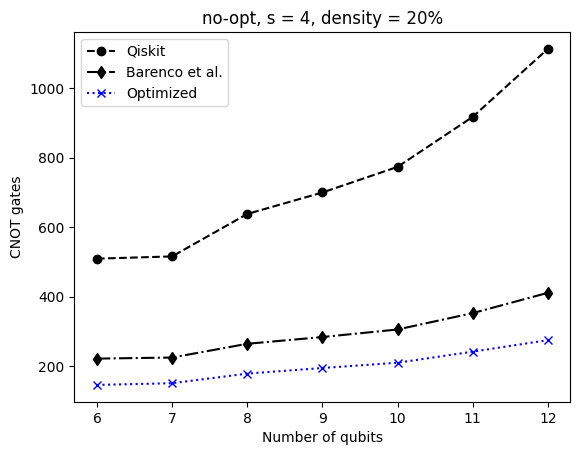

In [33]:
plt.plot(n_qubits, cnots_cvoqram["opt-lvl-0"], color='black', marker="o", linestyle='--', label='Qiskit')
plt.plot(n_qubits, cnots_cvoqram_barenco["opt-lvl-0"], color='black', marker="d", linestyle='-.', label='Barenco et al.')
plt.plot(n_qubits, cnots_cvoqram_linear["opt-lvl-0"], color='blue', marker="x", linestyle=':', label='Optimized')
plt.xlabel('Number of qubits')
plt.ylabel('CNOT gates')
plt.title('no-opt, s = {}, density = {}%'.format(s, int(p*100)))
plt.legend()
plt.savefig("no-opt.pdf")
plt.show()

#### Optimziation level 1

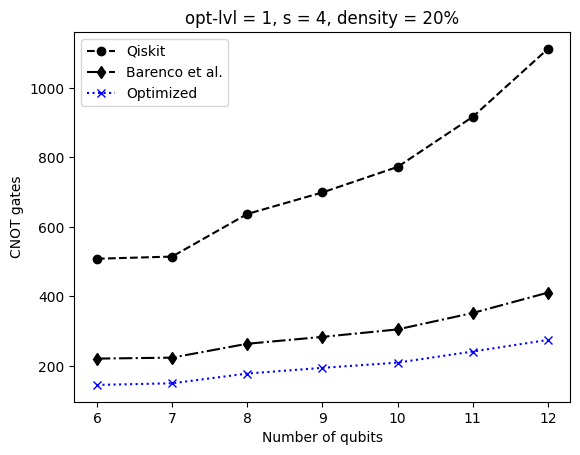

In [34]:
plt.plot(n_qubits, cnots_cvoqram["opt-lvl-1"], color='black', marker="o", linestyle='--', label='Qiskit')
plt.plot(n_qubits, cnots_cvoqram_barenco["opt-lvl-1"], color='black', marker="d", linestyle='-.', label='Barenco et al.')
plt.plot(n_qubits, cnots_cvoqram_linear["opt-lvl-1"], color='blue', marker="x", linestyle=':', label='Optimized')
plt.xlabel('Number of qubits')
plt.ylabel('CNOT gates')
plt.title('opt-lvl = 1, s = {}, density = {}%'.format(s, int(p*100)))
plt.legend()
plt.savefig("opt-lvl-1.pdf")
plt.show()

#### Optimization level 2

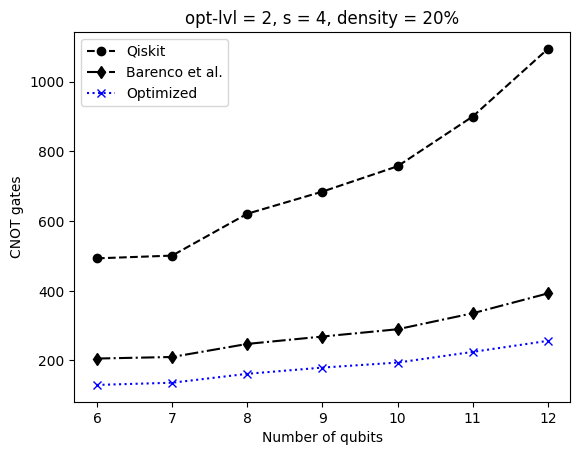

In [35]:
plt.plot(n_qubits, cnots_cvoqram["opt-lvl-2"], color='black', marker="o", linestyle='--', label='Qiskit')
plt.plot(n_qubits, cnots_cvoqram_barenco["opt-lvl-2"], color='black', marker="d", linestyle='-.', label='Barenco et al.')
plt.plot(n_qubits, cnots_cvoqram_linear["opt-lvl-2"], color='blue', marker="x", linestyle=':', label='Optimized')
plt.xlabel('Number of qubits')
plt.ylabel('CNOT gates')
plt.title('opt-lvl = 2, s = {}, density = {}%'.format(s, int(p*100)))
plt.legend()
plt.savefig("opt-lvl-2.pdf")
plt.show()

#### Optimization level 3

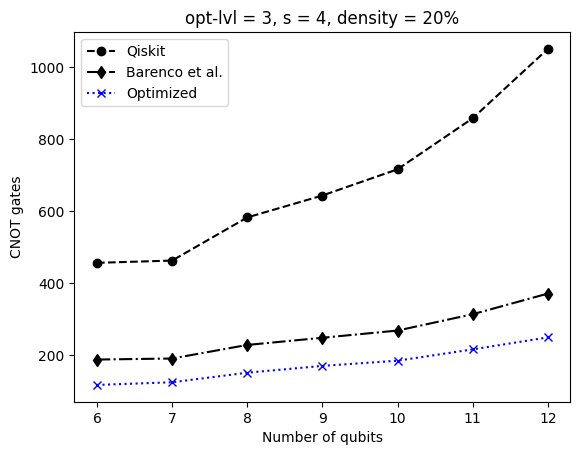

In [36]:
plt.plot(n_qubits, cnots_cvoqram["opt-lvl-3"], color='black', marker="o", linestyle='--', label='Qiskit')
plt.plot(n_qubits, cnots_cvoqram_barenco["opt-lvl-3"], color='black', marker="d", linestyle='-.', label='Barenco et al.')
plt.plot(n_qubits, cnots_cvoqram_linear["opt-lvl-3"], color='blue', marker="x", linestyle=':', label='Optimized')
plt.xlabel('Number of qubits')
plt.ylabel('CNOT gates')
plt.title('opt-lvl = 3, s = {}, density = {}%'.format(s, int(p*100)))
plt.legend()
plt.savefig("opt-lvl-3.pdf")
plt.show()